In [1]:
import new_sim as sim
import matplotlib.pyplot as plt
import numpy as np
import par_gen_alg as alg
import class_tests
import stats
from multiprocessing import Pool
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["figure.dpi"] = 150

## Class Tests

In [52]:
class_tests.main()
# cell settings
settings = {'duration' : 1000, 'beta' : 0.4, 'FPS' : 100, 'budget' : 200_000}
# (K1, K2, K, m_dens, m_cov, dir_prob, sens)
initial = {'k1' : 1000, 'k2' : 1000, 'K' : 10000, 'm_dens' : 0.01, 'm_cov' : 0.1, 'dir_prob' : 0.01, 'imp_sens' : 1}

Cell class okay
1 of 2 (total 1) finished in  1.80 seconds...
2 of 2 (total 2) finished in  0.12 seconds...
Done!
Genetic class okay


## Population Scale Behavior

In [16]:
genalg = alg.Genetic(50, 1, settings, initial)
with Pool(6) as pool:
    genalg.parallel_gen_alg(1, pool)

1 of 1 (total 1) finished in  19.99 seconds...
Done!


## Individual Behavior

In [29]:
cell = sim.Cell(settings)
cell.initialize(initial)
cell.visual_run()

SystemExit: 

In [53]:
cell = sim.Cell(settings)
cell.initialize(initial)
wall1_pos, wall2_pos, mots_pos, mots_mom = cell.detailed_run()

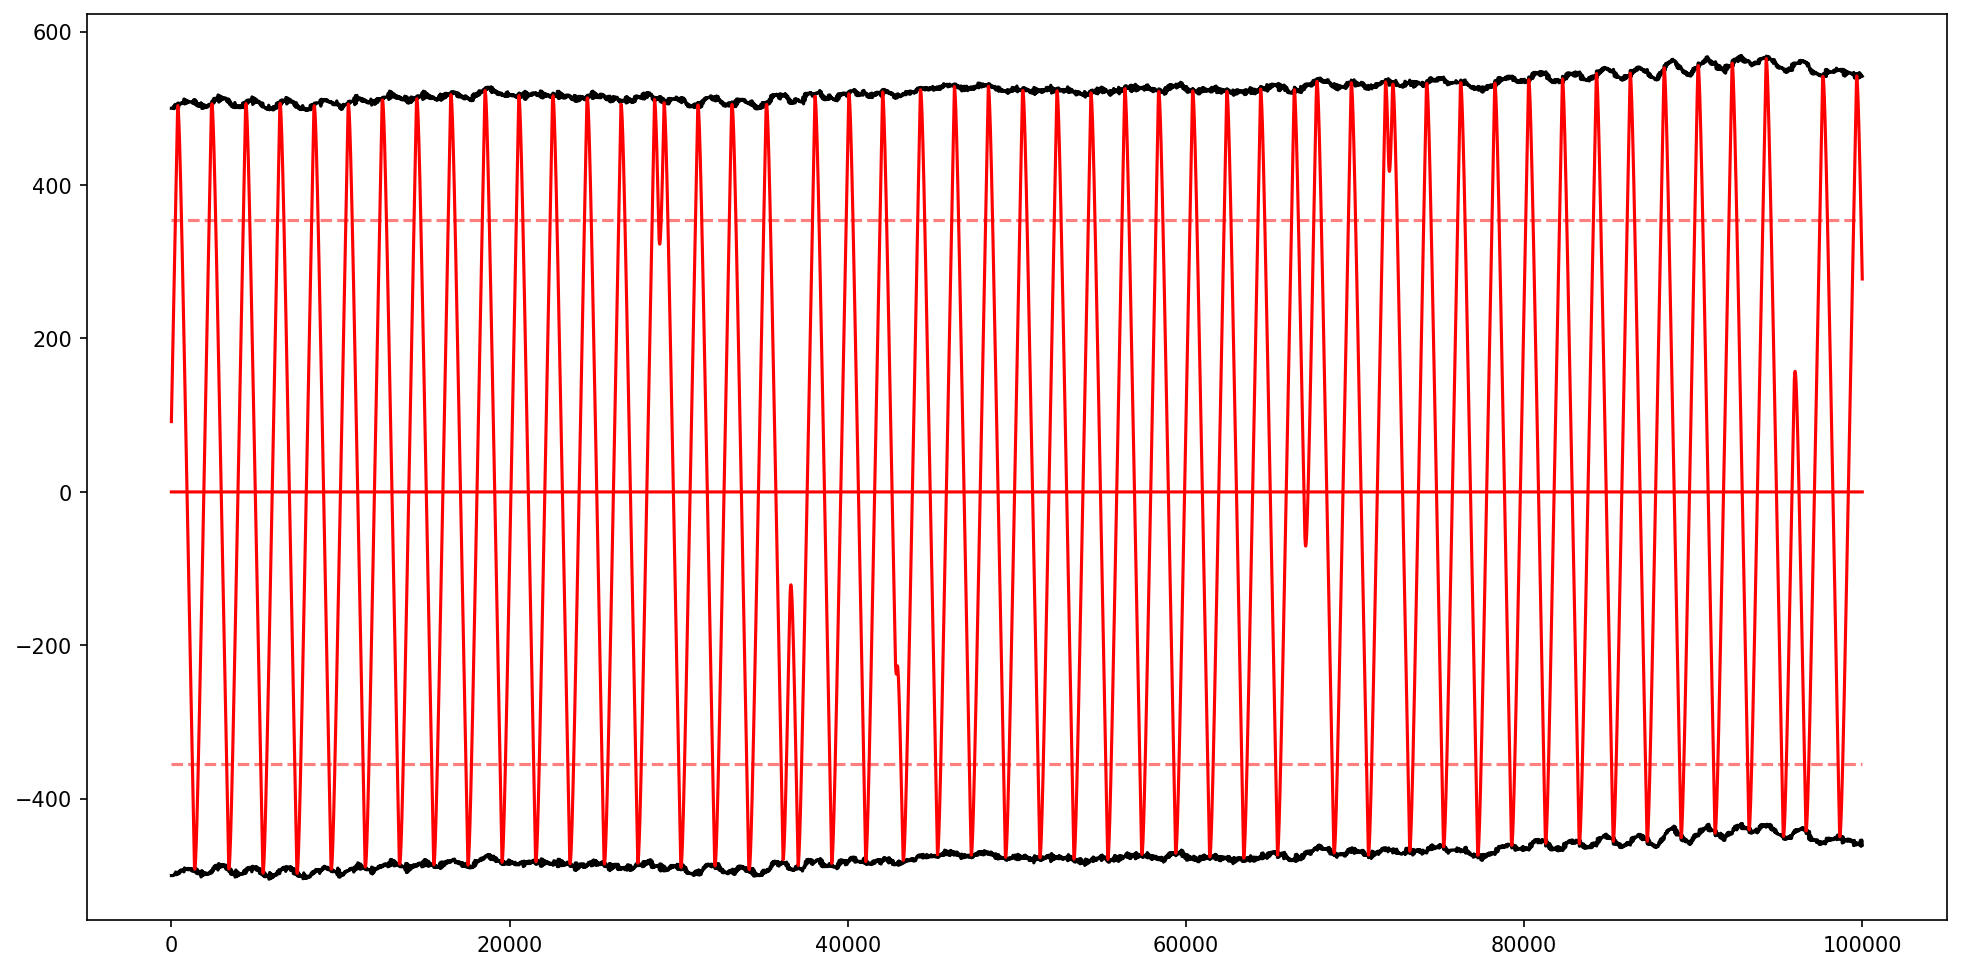

In [56]:
# MAKE THIS SAME GRAPH FOR THE PREVIOUS SIMULATION
xrange = cell.DURATION/cell.TIME_STEP
fig, ax = plt.subplots()
ax.plot(wall1_pos, c = 'black')
ax.plot(wall2_pos, c = 'black')
#ax.set_ylim([480,600])
for i in range(1):
    color = ['red','blue','green', 'orange', 'magenta']
    c = color[i%5]
    ax.plot(mots_pos[i], c = c)
    ax.plot(-np.diff(mots_mom[i]), c = c)
    center = cell.motors[i].IMP_CENTER
    ax.hlines([-center,center],xmin=0,xmax=xrange,color = c, linestyles = '--', alpha = 0.5)